# introduction 

The dataset I've chosen for examination is the 'Mroz' data frame from the Panel Study of Income Dynamics (PSID), sourced from R's dataset collection. This dataset contains observations of married women in the U.S., focusing on their labor force participation and its influencing factors. Each entry in this dataset is associated with a specific married woman, highlighting details about her and her family's demographic and economic conditions. It comprises eight attributes: lfp, k5, k618, age, wc, hc, lwg, and inc.

source from :https://vincentarelbundock.github.io/Rdatasets/doc/carData/Mroz.html
        
the core research question we are going to analyze is How do factors such as the number of children, age, educational background of both the wife and husband influence the labor-force participation of married women in the U.S.

Here is the description variable:

| Variable of dataset   | description                                                                                                                                                                                                 |
|:-------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| lfp                      | Labor-force participation; a factor with levels: no; yes                                                                                                                             |
| k5                       | Number of children 5 years old or younger                                                                                                                                            |
| k618                     | Number of children 6 to 18 years old                                                                                                                                                 |
| age                      | Age in years                                                                                                                                                                         |
| wc                       | Wife's college attendance; a factor with levels: no; yes                                                                                                                             |
| hc                       | Husband's college attendance; a factor with levels: no; yes                                                                                                                          |
| lwg                      | Log expected wage rate; for women in the Labor force, the actual wage rate; for women not in the labor force, an imputed value based on the regression of lwg on the other variables |
| inc                      | Family income exclusive of wife's income                                                                                                                                      


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
from src.laborforce_analysis.data_summary import LaborForceDataAnalysis 

labor_force_analysis = LaborForceDataAnalysis("https://raw.githubusercontent.com/Francesgaba/DATA5400/main/Mroz.csv")
if labor_force_analysis.load_data():
    labor_force_analysis.explore_data() 

   rownames  lfp  k5  k618  age   wc  hc       lwg        inc
0         1  yes   1     0   32   no  no  1.210165  10.910001
1         2  yes   0     2   30   no  no  0.328504  19.500000
2         3  yes   1     3   35   no  no  1.514128  12.039999
3         4  yes   0     3   34   no  no  0.092115   6.800000
4         5  yes   1     2   31  yes  no  1.524280  20.100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  753 non-null    int64  
 1   lfp       753 non-null    object 
 2   k5        753 non-null    int64  
 3   k618      753 non-null    int64  
 4   age       753 non-null    int64  
 5   wc        753 non-null    object 
 6   hc        753 non-null    object 
 7   lwg       753 non-null    float64
 8   inc       753 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 53.1+ KB
None
         rownames          

There are 753 rows in total, two continuous variables: lwg, inc, three discrete variables: k5, k618, age, and three categorical variables: k5, k618, age. The original dataset has data types float, integer, and object. After encoding the categorical columns, they are now integers.
#### K5:
The average number of children under 5 (k5) is 0.24, suggesting that most women in the dataset have fewer than one child under 5 years old. 75% of the data indicates 0 children under 5, with a maximum of 3. This means there are very few women with more than 2 children under 5.

#### k618:
The average number of children between the ages of 6 to 18 is 1.35. Half of the women have 1 child in this age range, and 75% have up to 2, with a maximum of 8.

#### Age:
The ages of the women in this dataset range from 30 to 60 years, with an average age of approximately 42.54 years. Half of the women are aged 43 or younger.

#### lwg:
The range for log wages is from -2.05 to 3.22, with an average of approximately 1.

#### Inc:
The family income varies, with an average of about 20.13. The median value is 17.7, indicating that half of the data falls below this value.

### EDA

For continuous variables like this, we plot them as histograms and box plot.

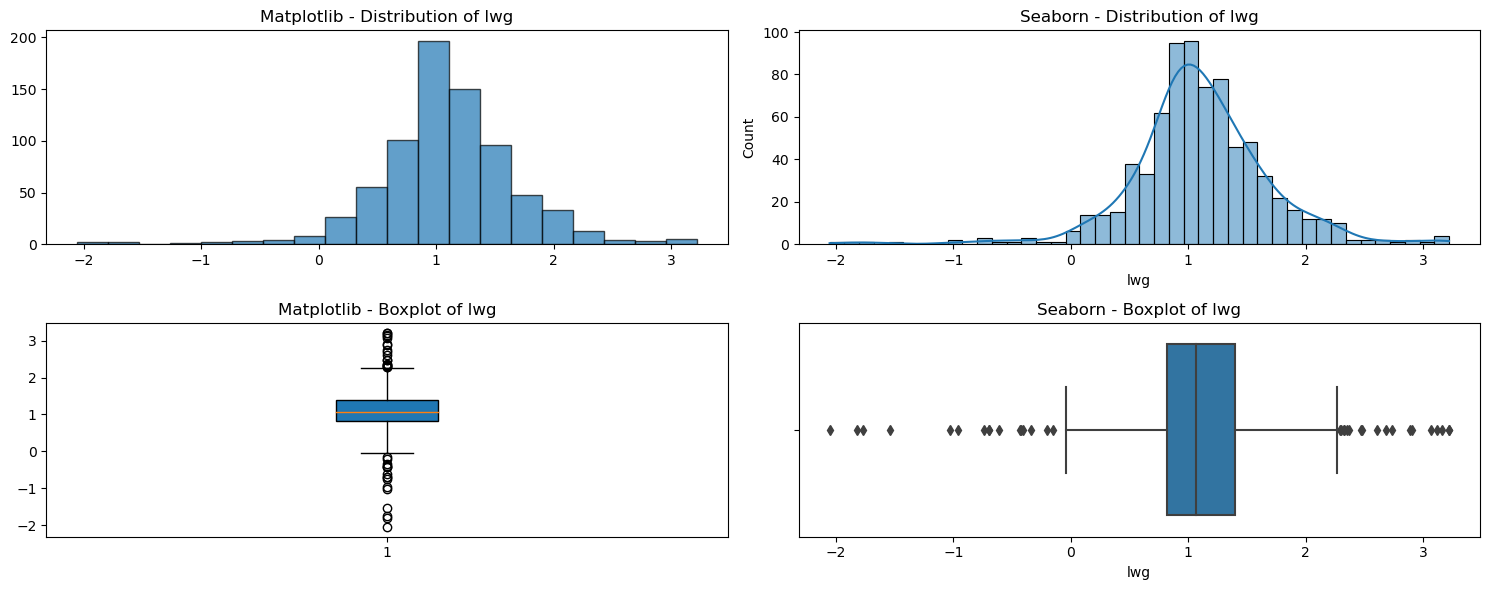

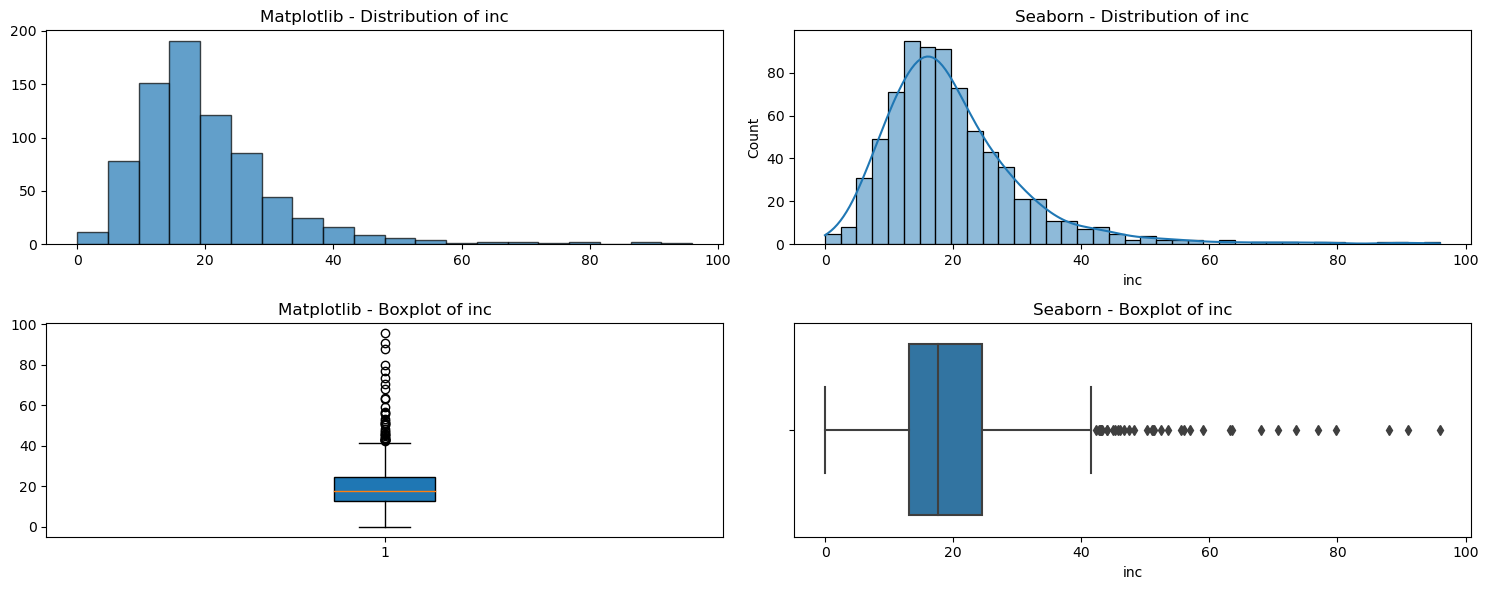

In [8]:
from src.laborforce_analysis.EDA import ContinuousVariableVisualization

visualization = ContinuousVariableVisualization(labor_force_analysis.df)
visualization.plot_histograms_and_boxplots()

#### lwg:
The distribution of 'lwg' variable, according to the histogram, show a symmetrical shape with a central peak roughly at the value of 1. The frequency of data points decreases steadily from the center towards both tails, showing a distribution that is relatively balanced on either side of the peak. This symmetry around the central could indicate a distribution of approximately normal, though formal statistical testing would be required to confirm this

#### inc:
The distribution of 'inc' variable, showing a pronounced skew towards the higher end of the scale. This right-skewed distribution suggests a greater concentration of data points in the lower income bracket, with a gradually decline in frequency as income increases. The presence of this tail indicates that while most families have a relatively low income, there are a few with significantly higher incomes

For continuous variables like this, we plot them as bar chart.

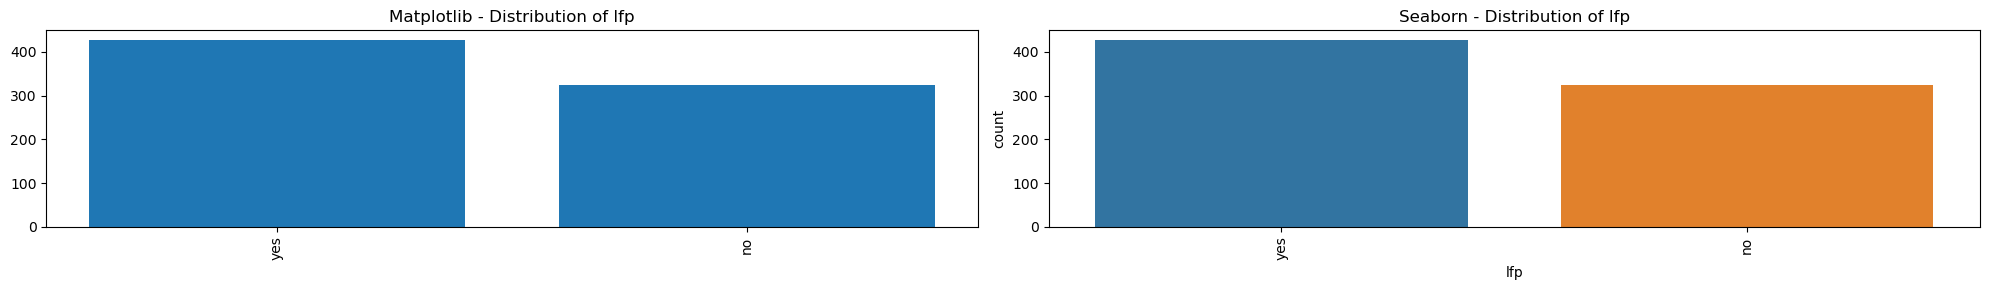

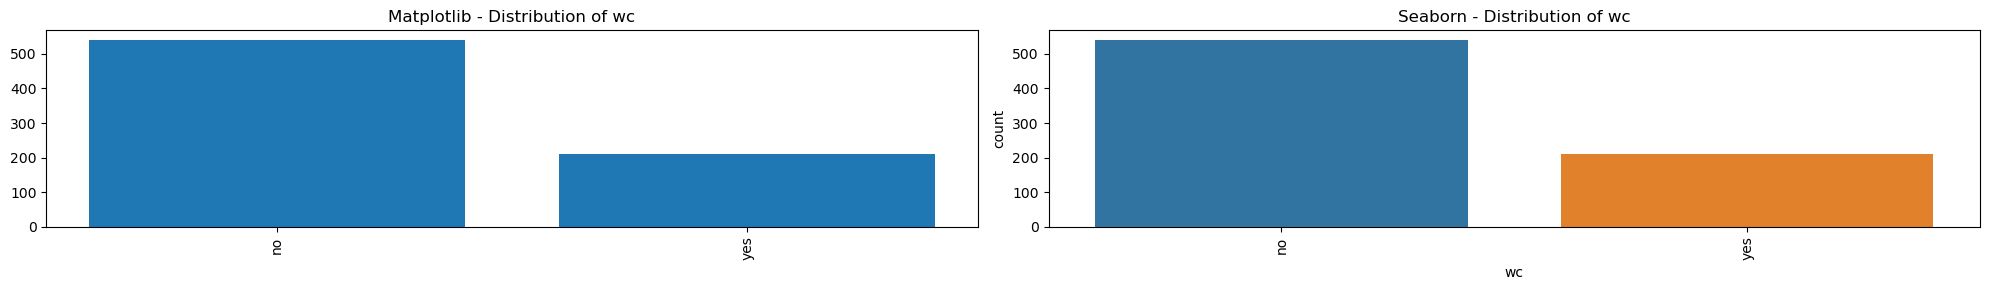

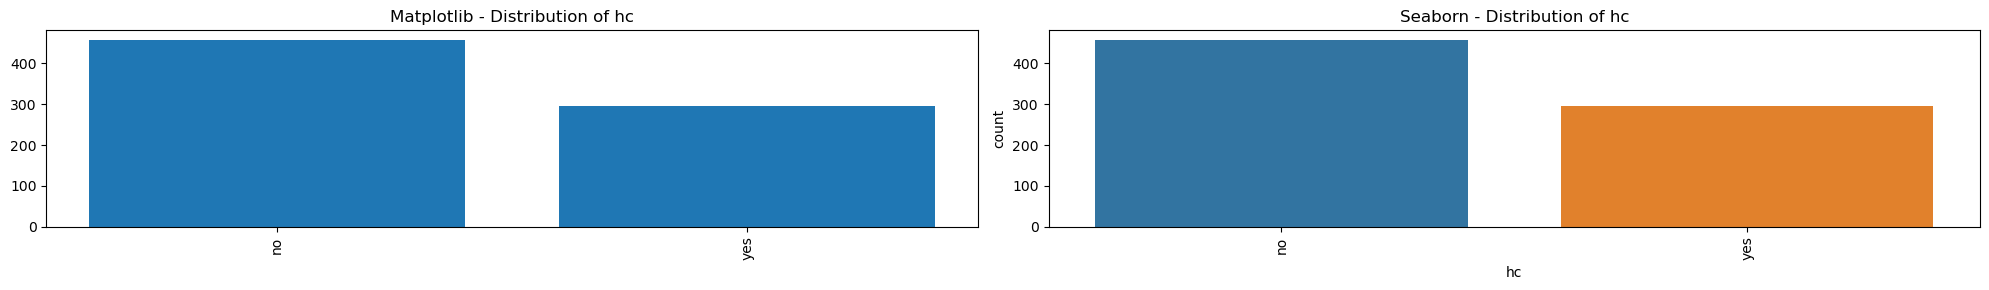

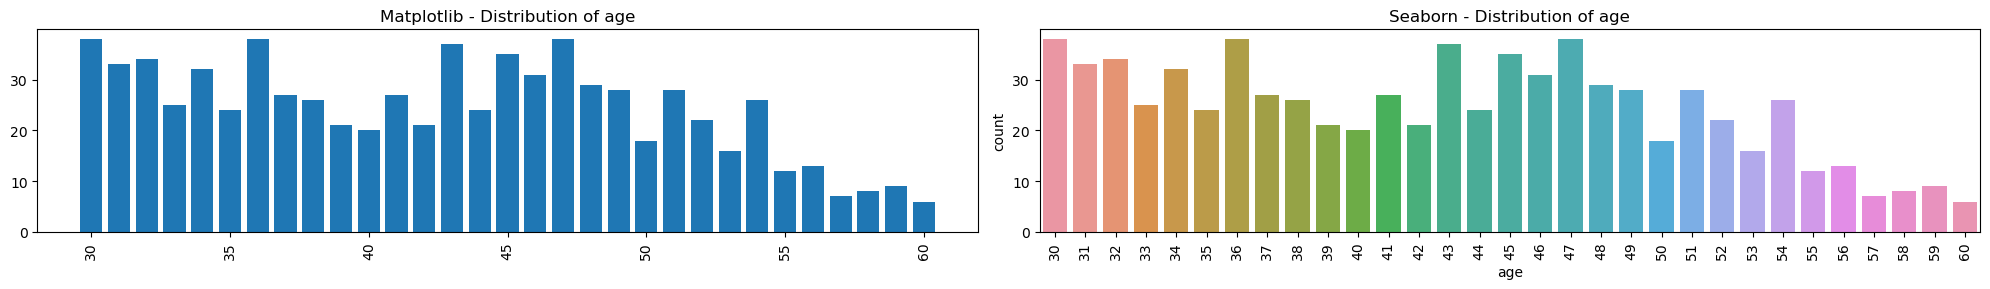

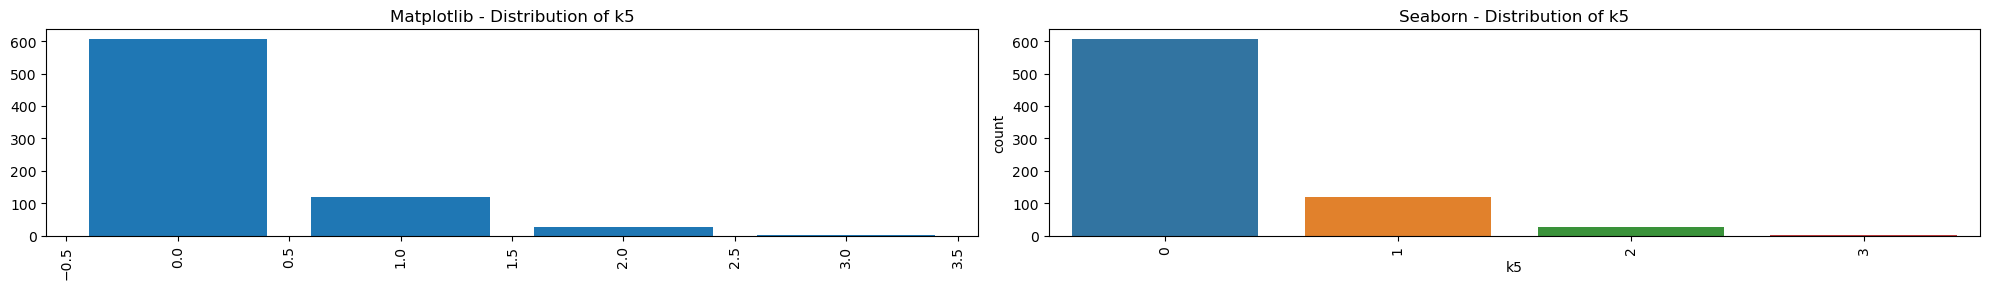

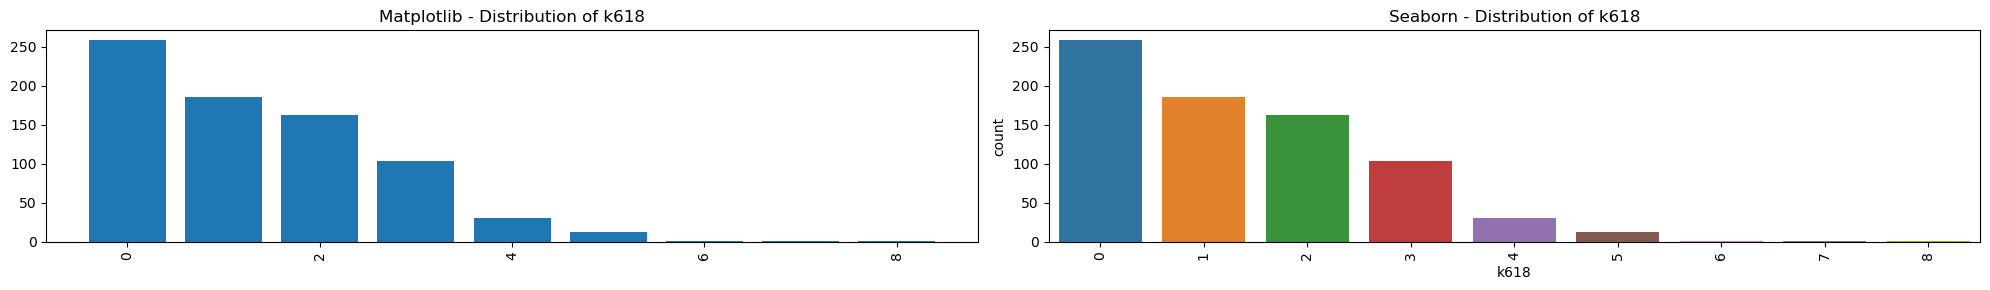

In [10]:
from src.laborforce_analysis.EDA import CategoricalDataVisualization

categorical_visualization = CategoricalDataVisualization(labor_force_analysis.df)
categorical_visualization.plot_distributions(['lfp', 'wc', 'hc', 'age', 'k5', 'k618'])

The bar charts above represent categorical and discrete variables. From these charts, we can discern that in the 'lfp' column, there are over 400 entries indicating 'yes'. In the 'wc' column, we observe around 200 'yes' entries. The 'hc' column reveals close to 300 'yes' responses. In terms of age distribution for the surveyed women, ages 36 and 48 have the most representation. nearly 600 respondents don't have children under 5 years. Furthermore, the distribution for 'k618' reveals that most families in the dataset have either 0 or 1 child aged between 6 to 18 years, and there's a significant decline in the count as the number of children within this age group increases.


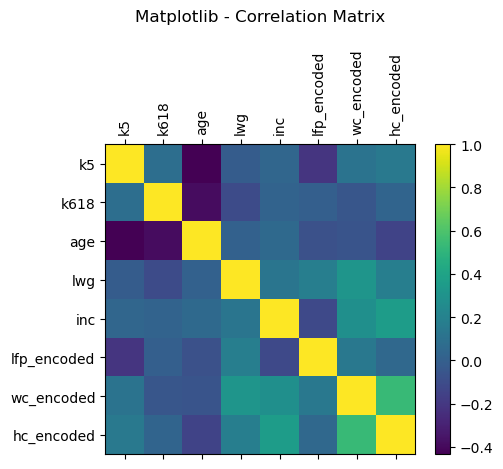

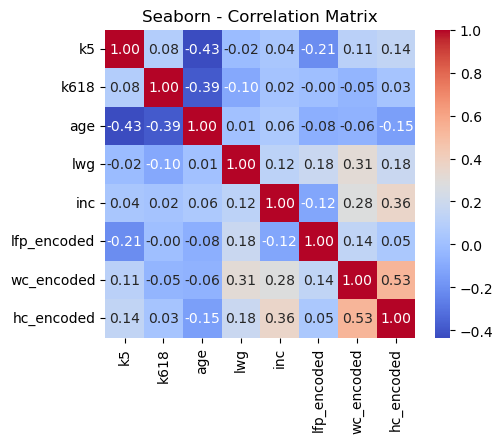

In [25]:
from src.laborforce_analysis.EDA import CorrelationMatrixVisualization

visualization = CorrelationMatrixVisualization(labor_force_analysis.df)

# encoding categorical variables
columns_to_encode = ['lfp', 'wc', 'hc']
mapping = {'yes': 1, 'no': 0}
visualization.encode_categorical_variables(columns_to_encode, mapping)

# Plotting correlation matrix
exclude_columns = ['rownames','lfp','wc','hc']  # column to exclude
visualization.plot_correlation_matrix(exclude_columns)


All variables have a perfect correlation of 1.00 with themselves, which is standard for any correlation matrix.

there is a moderate negative correlation between age and the number of children 5 years old or younger (k5), and between age and the number of children 6 to 18 years old (k618), indicating that younger women  totend have more children. There's also a moderate positive correlation between the husband's and wife's college attendance (hc and wc ), indicating that spouses are likely to have similar levels of education. Labor force participation (lfp ) shows a slight negative correlation with the number of young children (k5) and age, which may imply that lfp on decreases with an increase in the number of young children and with the age of the women. Other variables show low correlations with labor force participation,indicating no strong linear relationship with this outcome.

#### Research question 1

How do the number and age of children impact the labor force participation of married women.

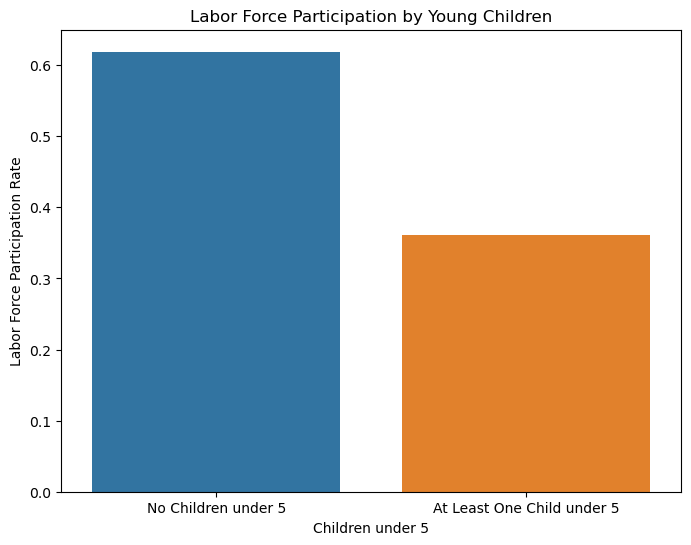

In [47]:
from src.laborforce_analysis.question_analysis import LaborForceParticipationVisualization

visualizer = LaborForceParticipationVisualization(labor_force_analysis.df)
visualizer.plot_lfp_by_k5()


Women with no children under the age of 5 have a higher labor force participation rate compared to those with at least one child under 5. This suggests that having younger children may be associated with a lower likelihood of participating in the labor force, possibly due to the increased childcare demands for very young children.

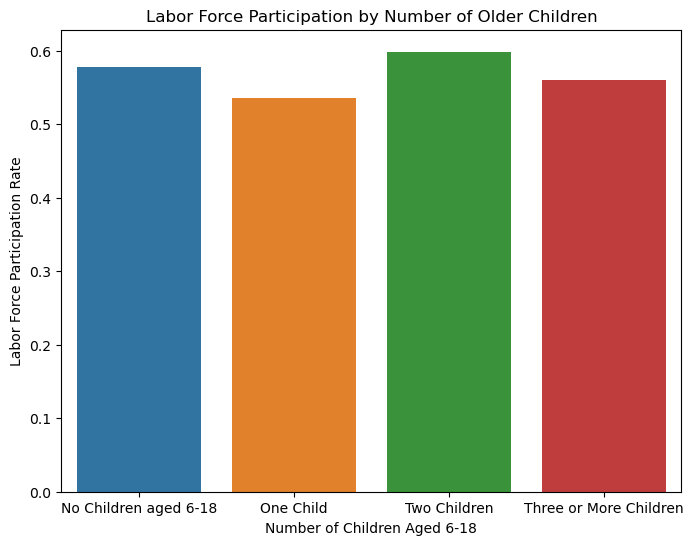

In [48]:

from src.laborforce_analysis.question_analysis import OlderChildrenLFPVisualization

older_children_lfp_viz = OlderChildrenLFPVisualization(labor_force_analysis.df)

# Creating a grouped variable for children aged 6-18
older_children_lfp_viz.create_grouped_children_variable()

# Plotting labor force participation by number of older children
older_children_lfp_viz.plot_lfp_rate_by_children_number()


Women with two children aged 6-18 have the highest labor force participation rate, while those with 1 or 3 children and have a lower rate.

This pattern may indicate that while having one child aged 6-18 might slightly decrease labor force participation, having two children incresing the rate. However, having three or more children aged 6-18 tends to decrease a woman's participation in the labor force, which could be due to the increased responsibility and potential scheduling complexities associated with managing the activities and needs of multiple older children.

#### Reseach question 2 

How does the educational background of both the wife and husband (college attendance) correlate with the labor force participation of married women?

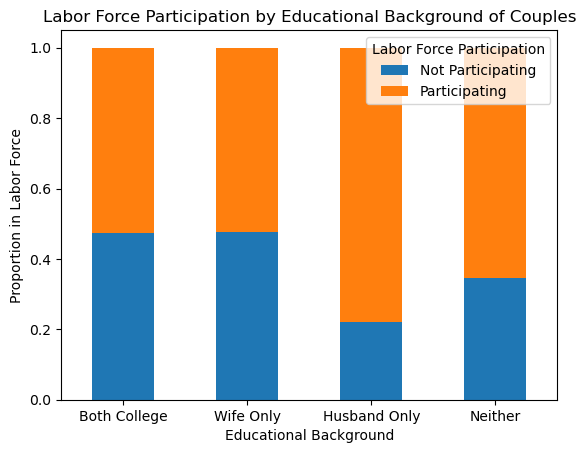

In [50]:
from src.laborforce_analysis.question_analysis import CouplesEducationLFPVisualization

visualization = CouplesEducationLFPVisualization(labor_force_analysis.df)
visualization.prepare_data()
visualization.plot_lfp_by_education()


Both College: Both the wife and husband attended college.
Wife Only:  Only the wife attended college.
Husband Only - Only the husband attended college.
Neither - Neither the wife nor the husband attended college.

This show that educational attainment, particularly where neither spouses and wife only have attended college, may be associated with a higher likelihood of labor force participation among married women

#### Reaserach question 3

What is the impact of age on the labor force participation of married women?

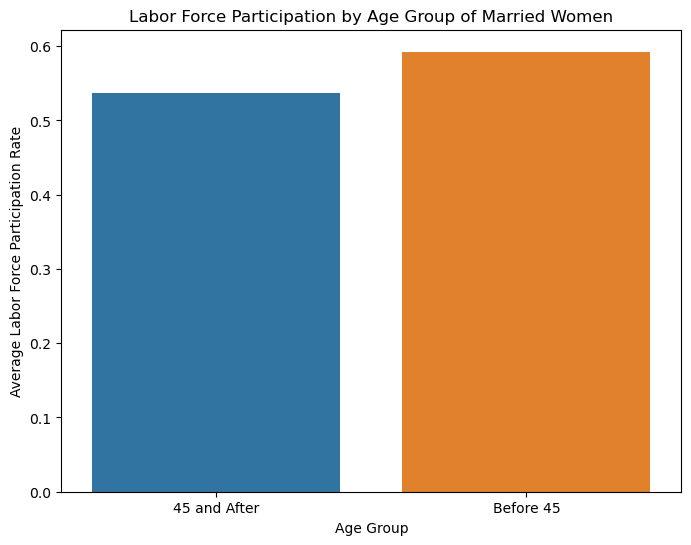

In [51]:
from src.laborforce_analysis.question_analysis import AgeGroupLFPVisualization
# Example usage:
# Assuming df is your DataFrame
visualization = AgeGroupLFPVisualization(labor_force_analysis.df)
visualization.create_age_group_variable()
visualization.plot_lfp_by_age_group()



 It show the average labor force participation rate of married women, that segmented into two age groups: before the age of 45 and 45 and after. The rate for those before 45 is visually higher than the rate for those 45 and after. This suggests a higher labor force participation among younger married women compared to their older counterparts.

## conclusion 

The graphical data reveals that women who have a college education are more inclined to be part of the labor force, especially if neither they nor their spouses have attended college. This tendency to participate in the workforce, however, declines with the rise in the number of children, with a more pronounced decrease observed among those with young children aged 0-5 years. This pattern implies that childcare responsibilities, particularly for younger children, may impede the ability to engage in work outside the home. Additionally, there is an inverse relationship between the presence of younger children and labor force activity. The age of the woman also plays a crucial role; women under the age of 45 are more likely to be employed.